## Ex 1

In [31]:
from fenics import *

def solve_laplace(n, f, gn):
    mesh = UnitSquareMesh(n, n, 'crossed')
    
    V = FunctionSpace(mesh, 'P', 1)
    
    u = TestFunction(V)
    v = TrialFunction(V)
    
    a = dot(grad(u), grad(v)) * dx + u * v * ds
    L = f * v * dx + gn * v * ds
    
    u = Function(V)
    solve(a==L, u)
    
    return u
    
u_ex = Expression('pow((cos(pi*x[0]) * cos(pi*x[1])), 2)', degree=3)
f = Expression('pi*pi*(cos(2*pi*(x[1] + x[0])) + cos(2*pi*(x[1] - x[0])) + cos(2*pi*x[1]) + cos(2*pi*x[0]))', degree=2)
gn = u_ex = Expression('pow((cos(pi*x[0]) * cos(pi*x[1])), 2)', degree=2)

n = 10
u = solve_laplace(n, f, gn)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


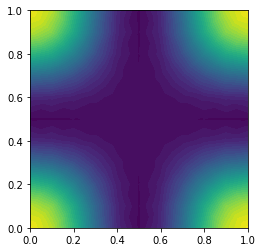

In [32]:
plot(u)

In [34]:
nvec = np.array((10, 20, 40))
errH1 = np.zeros(3)
errL2 = np.zeros(3)
for i in range(3):
    n = nvec[i]
    u = solve_laplace(n, f, gn)
    errH1[i] = errornorm(u_ex, u, 'H1')
    errL2[i] = errornorm(u_ex, u, 'L2')
    print('n = ', n)
    print('H1 error = ', errH1[i])
    print('L2 error = ', errL2[i])

Solving linear variational problem.
n =  10
H1 error =  0.2956806443337973
L2 error =  0.006711371407584575
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
n =  20
H1 error =  0.14816435508785966
L2 error =  0.0016757440022971614
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
n =  40
H1 error =  0.07412267654562328
L2 error =  0.0004188025632524667


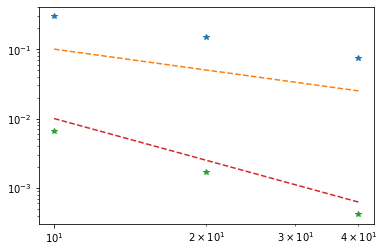

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.loglog(nvec, errH1, '*')
ax.loglog(nvec, 1/nvec, '--')
ax.loglog(nvec, errL2, '*')
ax.loglog(nvec, 1/nvec**2, '--')

## Ex 2

/usr/lib/python3/dist-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/usr/lib/python3/dist-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


Solving linear variational problem.


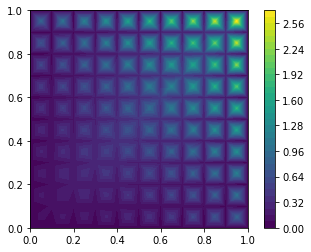

In [1]:
from fenics import *
import matplotlib.pyplot as plt
n = 10
degree = 1
mu = Constant(1e-3)
b = Constant((1.0, 1.0))
f = Constant(1.0)
gD = Constant(0.0)
def solve_problem(n, degree, f, gD, b, mu):
    mesh = UnitSquareMesh(n, n, 'crossed')
    V = FunctionSpace(mesh, 'CG', degree)
    def boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V, gD, boundary)
    u = TrialFunction(V)
    v = TestFunction(V)
    a = (mu * dot(grad(u), grad(v)) + dot(b, grad(u)) * v) * dx
    L = f * v * dx
    u = Function(V)
    solve(a == L, u, bc)
    return u, mesh
u, mesh = solve_problem(n, degree, f, gD, b, mu)
ax = plot(mesh)
ax = plot(u)
plt.colorbar(ax,fraction=0.045)
plt.show()

Object cannot be plotted directly, projecting to piecewise linears.


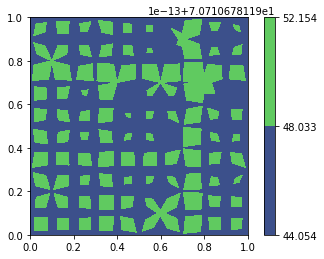

In [4]:
h = CellDiameter(mesh)
Pe = sqrt(dot(b, b)) * h / (2 * mu)
ax = plot(Pe)
plt.colorbar(ax)

Solving linear variational problem.


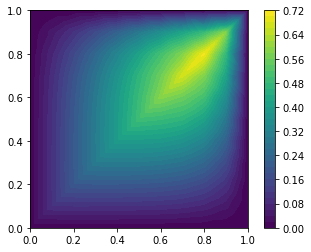

In [10]:
# Correction: streamline diffusion
from fenics import *
import matplotlib.pyplot as plt
n = 10
degree = 1
mu = Constant(1e-3)
b = Constant((1.0, 1.0))
f = Constant(1.0)
gD = Constant(0.0)
def solve_problem(n, degree, f, gD, b, mu, tau=0):
    mesh = UnitSquareMesh(n, n, 'crossed')
    V = FunctionSpace(mesh, 'CG', degree)
    def boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V, gD, boundary)
    u = TrialFunction(V)
    v = TestFunction(V)
    a = (mu * dot(grad(u), grad(v)) + dot(b, grad(u)) * v) * dx
    
    # Stabilization (consistent term)
    h = CellDiameter(mesh)
    a_stab = tau * h * dot(grad(u), b) * dot(grad(v), b) * dx
    a += a_stab
     
    
    L = f * v * dx
    u = Function(V)
    solve(a == L, u, bc)
    return u, mesh

tau = 1
u, mesh = solve_problem(n, degree, f, gD, b, mu, tau=tau)
ax = plot(mesh)
ax = plot(u)
plt.colorbar(ax,fraction=0.045)
plt.show()

## Ex 3

In [13]:
import numpy as np
def build_tridiag(n):
    return 2*np.eye(n) - np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)

In [24]:
nvec = np.array((10, 20, 40, 80))
condvec = np.zeros(4)
hvec = np.zeros(4)

In [25]:
for i in range(4):
    n = nvec[i]
    A = build_tridiag(n)
    hvec[i] = 1/(n+1)
    condvec[i] = np.linalg.cond(A)

Compare the analytical estimate
$$ k(A) \sim \dfrac{4}{(\pi h)^2}$$
with the computed values.

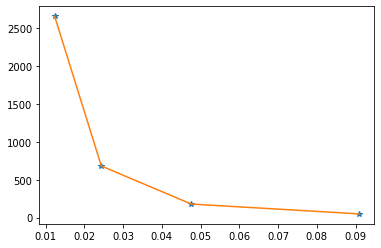

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(hvec, condvec, '*')
ax.plot(hvec, 4/(hvec*np.pi)**2)